### Mustafa Nazlıer - 15050111035 - Data Mining Course - Homework 4 

In [1]:

import pandas as pd   #importing pandas
import matplotlib.pyplot as plt #importing the necessary plotting library for the graphs
                          
    #Pca is a tool used for data visualization or data pre-processing 
    #Kmeans is a clustering algorithm for discovering unknown subgroups in data


In [2]:
CustomerData = pd.read_csv('WholesaleCustomersData.csv') #Reading my csv file that I have found from the 
                                                         #the UCI Machine Learning Repository by the given link:"https://archive.ics.uci.edu/ml/datasets/Wholesale+customers"

    
#Preparing the dataframe for to run Pca and Kmeans on it
Customerdf = pd.DataFrame(CustomerData, columns=['Channel','Region','Fresh','Milk','Grocery', 'Frozen','Detergents','Delicassen'])

#The spesific dataset I will be using is about the sales of a wholesale distributor
#It includes the annual spendings in  diverse product categories 

#The Column name Channel refers to the buyer place "1:Hotel/Restaurant/Cafe , 2:Retail"
#The Column name Region refers to "1:Lisbon ,  2:Oporto , 3:Other"
#The remaining columns are for the types of the products that is bought


#Our data has 8 dimensions and firstly, using PCA, we are going to reduce its dimensions

Customerdf.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
from sklearn.decomposition import PCA #importing PCA(principal component analysis) from the sklearn for to reduce the dimension of our dataset
from sklearn.preprocessing import StandardScaler #we are importing StandartScaler to normalize our data

#The next step is to do "Standardization" on our data, This step is very important for us, to stabilize the variance range between each dimension
#it will transform our data in a way that its distribution will have a mean value 0 and standard deviation of 1
#Now all of our dimensions(columns) have the same scale

CustomerdfScaled = StandardScaler().fit_transform(Customerdf) #Standardization

#Creating the pca object with 8 components 

#As a side note, I have seen examples of PCA usage that is first creating the pca object with no components input, then 
#examining the variance of each column, then deciding the component number that we are going to include in pca
#However, after trying the that way also, I did not seen a considerable change in the result, probably that's why we were removing them
#in the first place. I will not do that for the sake of simplicity because I am not entirely sure that it is %100 necessary


myPCA = PCA(n_components=8) # number of components is the number of dimensions

myPC = myPCA.fit_transform(CustomerdfScaled) #Fitting and transforming our data

myPC_df= pd.DataFrame(myPC) #creating a dataframe from my new components

myPC_df


,0,1,2,3,4,5,6,7
0,0.843939,-0.515351,-0.767632,-0.044215,-0.446234,-0.939441,0.654762,0.018102
1,1.062676,-0.484601,-0.672975,0.401372,-0.130458,-0.867227,0.511022,0.077895
2,1.269141,0.682055,-0.664095,1.634953,-1.193813,-1.078442,-0.203152,-0.254037
3,-1.056782,0.610821,-0.505654,0.196005,0.457855,0.116959,-0.313804,0.054377
4,0.634030,0.974199,-0.771209,0.186374,-0.813877,-1.505372,-0.160399,0.003763
...,...,...,...,...,...,...,...,...
435,0.222884,2.480505,-0.360936,-0.601036,1.109212,0.364851,0.346184,0.860980
436,-1.290172,1.560397,-0.756171,-1.342401,-0.533462,-0.205789,-0.242280,-0.226984
437,3.865149,-0.479854,-0.525345,-0.687132,0.108968,0.280320,-0.575297,-0.089003
438,-1.097067,-0.069896,-0.630128,0.311821,-0.424792,0.335170,-0.153744,-0.037308


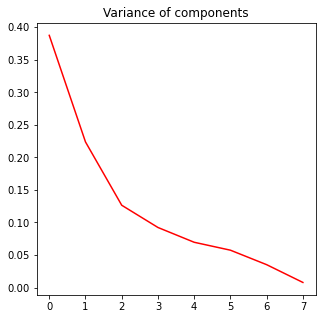

In [4]:
# We can see each dimensions variance now, basically  all off the data on the first dataframe is reduced to 8
# principal components that have no correlation between them. 
# We can observe their variance by this plotting
plt.figure(figsize = (5,5))
plt.plot(range(0,8) , myPCA.explained_variance_ratio_ ,color='red' )
plt.title('Variance of components')
plt.show()




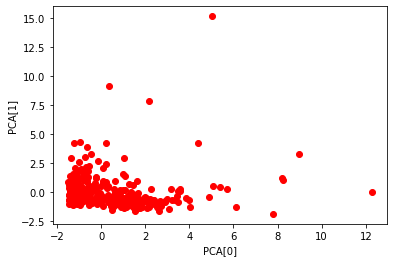

In [5]:
# getting the first 2 components bcz of the variance
plt.scatter(myPC_df[0], myPC_df[1], color='red')
plt.xlabel('PCA[0]')
plt.ylabel('PCA[1]')
plt.show()

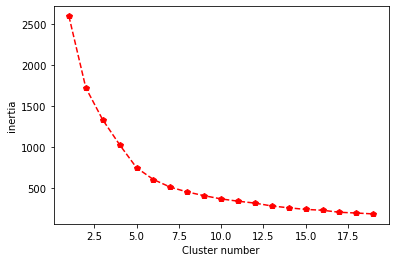

In [6]:
from sklearn.cluster       import KMeans # Importing the KMeans from the sklearn for the clustering

inertias = []

# The range determines how many times that we are going to test the numbers we may choose as a cluster number
#I will be using the inertia to find out what would be a good choice of cluster

for k in range(1,20):   #I will be testing for up to 20 clusters
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(myPC_df.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(range(1,20), inertias, '--p' ,color='red')
plt.xlabel('Cluster number')
plt.ylabel('inertia')
plt.show()

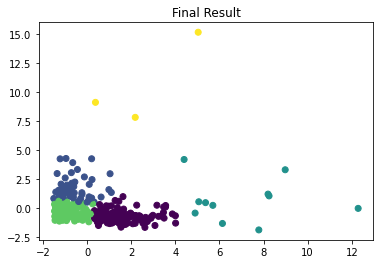

In [11]:
#With K-means clustering, there is an important thing which is "the elbow-method", observing the above graph,
#I should decide a number of cluster-inertia point on the graph that looks like an elbow which indicates a 
#transition to the steep downfall to a more smooth line
#In my case, I will be choosing to use 5 clusters

model = KMeans(n_clusters=5) #cluster number as input
model.fit(myPC_df.iloc[:,:2]) #first two  of my PCA's components

labels = model.predict(myPC_df.iloc[:,:2])
plt.scatter(myPC_df[0], myPC_df[1], c=labels)
plt.title('Final Result')
plt.show()